In [2]:
from datetime import timedelta
from fitparse import FitFile
import os
import pandas as pd

In [10]:
def parse_fit_file(fit_file_path):
    fitfile = FitFile(fit_file_path)
    records = []
    for record in fitfile.get_messages('record'):
        data = {}
        for field in record:
            data[field.name] = field.value
            # 调试输出字段单位（可选）
            # print(f"{field.name}: {field.units}") if field.units else None

        if 'timestamp' in data and 'distance' in data and 'speed' in data:
            data['timestamp'] = data['timestamp'] + timedelta(hours=8)  # UTC+8
            # data['distance'] *= 1.60934  # 转为千米
            data['enhanced_speed'] *= 3.6
            data['speed'] *= 3.6        # 转为 km/h
            records.append(data)

    # df = pd.DataFrame(records)
    # df['timestamp'] = pd.to_datetime(df['timestamp'])
    # return df
    return records

In [14]:
records = parse_fit_file('./parser/fit_file/test.fit')

In [20]:
records[10]

{'distance': 1.01,
 'enhanced_speed': 0.2988,
 'grade': 0.0,
 'position_lat': 476115378,
 'position_long': 1389153842,
 'speed': 0.2988,
 'temperature': 11,
 'timestamp': datetime.datetime(2025, 4, 4, 7, 56, 50)}

In [24]:
x = []
y = []
for row in records:
    if 'position_lat' in row and 'position_long' in row:
        x.append(row['position_lat'])
        y.append(row['position_long'])

In [28]:
from matplotlib import pyplot as plt

In [44]:
import numpy as np

In [97]:
latitude = np.array(x) * (180 / pow(2, 31))
longitude = np.array(y) * (180 / pow(2, 31))

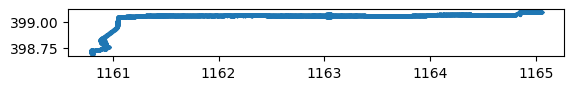

In [92]:
plt.scatter(longitude, latitude, s=2)
# plt.xlim(11607, 11653)
# plt.ylim(3985.5, 3993.5)
plt.gca().set_aspect('equal')  # 强制等比例
plt.show()

NameError: name 'lons' is not defined

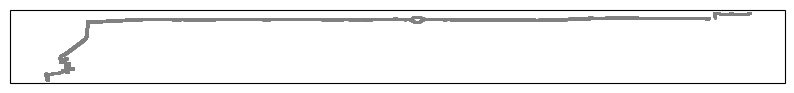

In [109]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(longitude, latitude, color='gray', s=1, transform=ccrs.PlateCarree())
ax.set_extent([min(lons), max(lons), min(lats), max(lats)])  # 自动等比例
ax.coastlines()  # 可选：添加海岸线
plt.show()